In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import time
sns.set_theme()

df_r = pd.read_csv('../data/cln_rotten_tomatoes_critic_reviews.csv')
df_m = pd.read_csv('../data/cln_rotten_tomatoes_movies.csv')

df_m.loc[0,'genres']

"['Action & Adventure', 'Comedy', 'Drama', 'Science Fiction & Fantasy']"

In [2]:
def destring(column):
    df_m[column] = df_m[column].map(lambda x: [y.strip("'") for y in x.strip('][').split(', ')])

In [3]:
df_m.head(2)

Unnamed: 0  idx rotten_tomatoes_link  \
0           0    0            m/0814255   
1           1    1            m/0878835   

                                         movie_title content_rating  \
0  Percy Jackson & the Olympians: The Lightning T...             PG   
1                                        Please Give              R   

                                              genres              directors  \
0  ['Action & Adventure', 'Comedy', 'Drama', 'Sci...     ['Chris Columbus']   
1                                         ['Comedy']  ['Nicole Holofcener']   

                                             authors  \
0  ['Craig Titley', 'Chris Columbus', 'Rick Riord...   
1                              ['Nicole Holofcener']   

                                              actors  runtime  \
0  ['Logan Lerman', 'Brandon T. Jackson', 'Alexan...    119.0   
1  ['Catherine Keener', 'Amanda Peet', 'Oliver Pl...     90.0   

       production_company tomatometer_status  tomatometer_rating  \
0        20th Century Fox             Rotten                49.0   
1  Sony Pictures Classics    Certified-Fresh                87.0   

   tomatometer_count audience_status  audience_rating  audience_count  \
0              149.0         Spilled             53.0        254421.0   
1              142.0         Upright             64.0         11574.0   

   tomatometer_top_critics_count  tomatometer_fresh_critics_count  \
0                             43                               73   
1                             44                              123   

   tomatometer_rotten_critics_count  
0                                76  
1                                19

In [4]:
for column in ['genres','directors','authors','actors']:
    destring(column)

print(type(df_m.loc[0,'genres']), type(df_m.loc[0,'actors']))

<class 'list'> <class 'list'>


In [5]:
df_m.drop(['Unnamed: 0','idx'], axis = 1, inplace = True)
df_m = df_m.loc[df_m['runtime'] >= 45]

In [6]:
df_m_bins = copy.deepcopy(df_m)
df_m_bins['audience_count'] = (df_m_bins['audience_count']//100)*100
print(f"Mean: {df_m_bins['audience_count'].mean()}, Median: {df_m_bins['audience_count'].median()}, Mode: {df_m_bins['audience_count'].mode()}")

Mean: 147451.29927523423, Median: 4400.0, Mode: 0    0.0
dtype: float64


In [7]:
print(df_m.shape)
df_m = df_m.loc[df_m['audience_count'] >= df_m['audience_count'].quantile(0.75)]
df_m.shape

(16971, 18)


(4243, 18)

In [8]:
df_r.head()

Unnamed: 0  idx rotten_tomatoes_link      critic_name  top_critic  \
0           0    0            m/0814255  Andrew L. Urban           0   
1           1    1            m/0814255    Louise Keller           0   
2           2    2            m/0814255        Anonymous           0   
3           3    3            m/0814255     Ben McEachen           0   
4           4    4            m/0814255      Ethan Alter           1   

            publisher_name review_type  review_score review_date  
0           Urban Cinefile       Fresh      0.541766  2010-02-06  
1           Urban Cinefile       Fresh      0.541766  2010-02-06  
2      FILMINK (Australia)       Fresh      0.541766  2010-02-09  
3  Sunday Mail (Australia)       Fresh      0.700000  2010-02-09  
4       Hollywood Reporter      Rotten      0.541766  2010-02-10

In [9]:
df_r.drop(['Unnamed: 0','idx'], axis = 1, inplace = True)

In [10]:
df = df_m.set_index('rotten_tomatoes_link').join(df_r.set_index('rotten_tomatoes_link'), how = 'left')
df.head()

movie_title  \
rotten_tomatoes_link                                                      
m/0814255             Percy Jackson & the Olympians: The Lightning T...   
m/0814255             Percy Jackson & the Olympians: The Lightning T...   
m/0814255             Percy Jackson & the Olympians: The Lightning T...   
m/0814255             Percy Jackson & the Olympians: The Lightning T...   
m/0814255             Percy Jackson & the Olympians: The Lightning T...   

                     content_rating  \
rotten_tomatoes_link                  
m/0814255                        PG   
m/0814255                        PG   
m/0814255                        PG   
m/0814255                        PG   
m/0814255                        PG   

                                                                 genres  \
rotten_tomatoes_link                                                      
m/0814255             [Action & Adventure, Comedy, Drama, Science Fi...   
m/0814255             [Action & Adventure, Comedy, Drama, Science Fi...   
m/0814255             [Action & Adventure, Comedy, Drama, Science Fi...   
m/0814255             [Action & Adventure, Comedy, Drama, Science Fi...   
m/0814255             [Action & Adventure, Comedy, Drama, Science Fi...   

                             directors  \
rotten_tomatoes_link                     
m/0814255             [Chris Columbus]   
m/0814255             [Chris Columbus]   
m/0814255             [Chris Columbus]   
m/0814255             [Chris Columbus]   
m/0814255             [Chris Columbus]   

                                                           authors  \
rotten_tomatoes_link                                                 
m/0814255             [Craig Titley, Chris Columbus, Rick Riordan]   
m/0814255             [Craig Titley, Chris Columbus, Rick Riordan]   
m/0814255             [Craig Titley, Chris Columbus, Rick Riordan]   
m/0814255             [Craig Titley, Chris Columbus, Rick Riordan]   
m/0814255             [Craig Titley, Chris Columbus, Rick Riordan]   

                                                                 actors  \
rotten_tomatoes_link                                                      
m/0814255             [Logan Lerman, Brandon T. Jackson, Alexandra D...   
m/0814255             [Logan Lerman, Brandon T. Jackson, Alexandra D...   
m/0814255             [Logan Lerman, Brandon T. Jackson, Alexandra D...   
m/0814255             [Logan Lerman, Brandon T. Jackson, Alexandra D...   
m/0814255             [Logan Lerman, Brandon T. Jackson, Alexandra D...   

                      runtime production_company tomatometer_status  \
rotten_tomatoes_link                                                  
m/0814255               119.0   20th Century Fox             Rotten   
m/0814255               119.0   20th Century Fox             Rotten   
m/0814255               119.0   20th Century Fox             Rotten   
m/0814255               119.0   20th Century Fox             Rotten   
m/0814255               119.0   20th Century Fox             Rotten   

                      tomatometer_rating  ...  audience_count  \
rotten_tomatoes_link                      ...                   
m/0814255                           49.0  ...        254421.0   
m/0814255                           49.0  ...        254421.0   
m/0814255                           49.0  ...        254421.0   
m/0814255                           49.0  ...        254421.0   
m/0814255                           49.0  ...        254421.0   

                     tomatometer_top_critics_count  \
rotten_tomatoes_link                                 
m/0814255                                       43   
m/0814255                                       43   
m/0814255                                       43   
m/0814255                                       43   
m/0814255                                       43   

                      tomatometer_fresh_critics_count  \
rotten_tomatoes_link            

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 563395 entries, m/0814255 to m/zulu
Data columns (total 23 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   movie_title                       563395 non-null  object 
 1   content_rating                    563395 non-null  object 
 2   genres                            563395 non-null  object 
 3   directors                         563395 non-null  object 
 4   authors                           563395 non-null  object 
 5   actors                            563395 non-null  object 
 6   runtime                           563395 non-null  float64
 7   production_company                563395 non-null  object 
 8   tomatometer_status                563395 non-null  object 
 9   tomatometer_rating                563395 non-null  float64
 10  tomatometer_count                 563395 non-null  float64
 11  audience_status                   563395 non-null

In [12]:
df.isna().sum()

movie_title                         0
content_rating                      0
genres                              0
directors                           0
authors                             0
actors                              0
runtime                             0
production_company                  0
tomatometer_status                  0
tomatometer_rating                  0
tomatometer_count                   0
audience_status                     0
audience_rating                     0
audience_count                      0
tomatometer_top_critics_count       0
tomatometer_fresh_critics_count     0
tomatometer_rotten_critics_count    0
critic_name                         0
top_critic                          0
publisher_name                      0
review_type                         0
review_score                        0
review_date                         0
dtype: int64

In [13]:
df['review_score'] = df['review_score']*5

In [14]:
df = df.explode('genres')
df.shape

(1275417, 23)

In [15]:
df.loc[df['genres'] == '', 'genres'] = 'No Genre'

In [16]:
df_g_sc = df.loc[df['genres'] != 'No Genre'].groupby('genres')['review_score'].median().sort_values(ascending = False)
df_g_sc.index = df_g_sc.index.map(lambda x: x.replace(' ','\n'))
df_g_sc.head()

genres
Classics                        4.214584
Gay\n&\nLesbian                 4.090909
Anime\n&\nManga                 3.921663
Art\nHouse\n&\nInternational    3.787458
Special\nInterest               3.750000
Name: review_score, dtype: float64

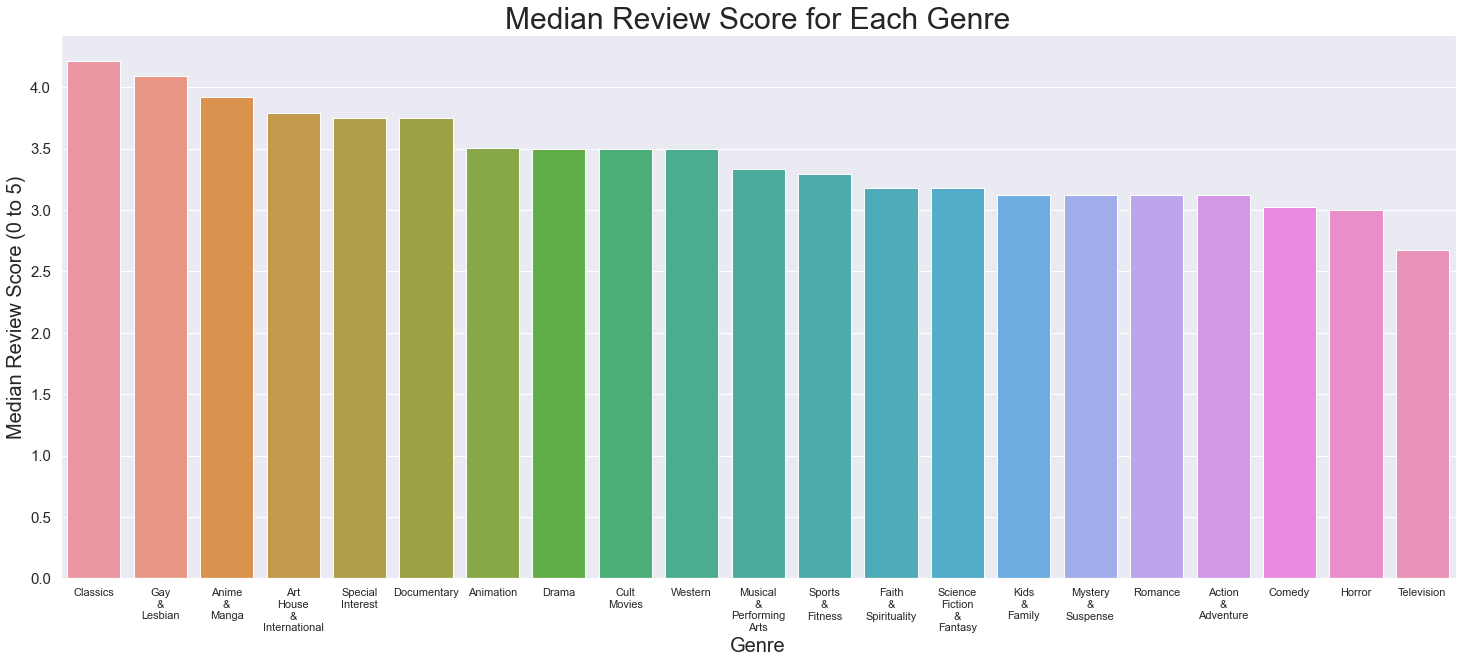

In [17]:
fig, ax = plt.subplots(figsize = (25,10))
ax = sns.barplot(x = df_g_sc.index, y = df_g_sc.values)

ax.set_title('Median Review Score for Each Genre', fontsize = 30)
ax.set_xlabel('Genre', fontsize = 20)
ax.set_ylabel('Median Review Score (0 to 5)', fontsize = 20)
ax.tick_params(axis = 'y', labelsize = 15);

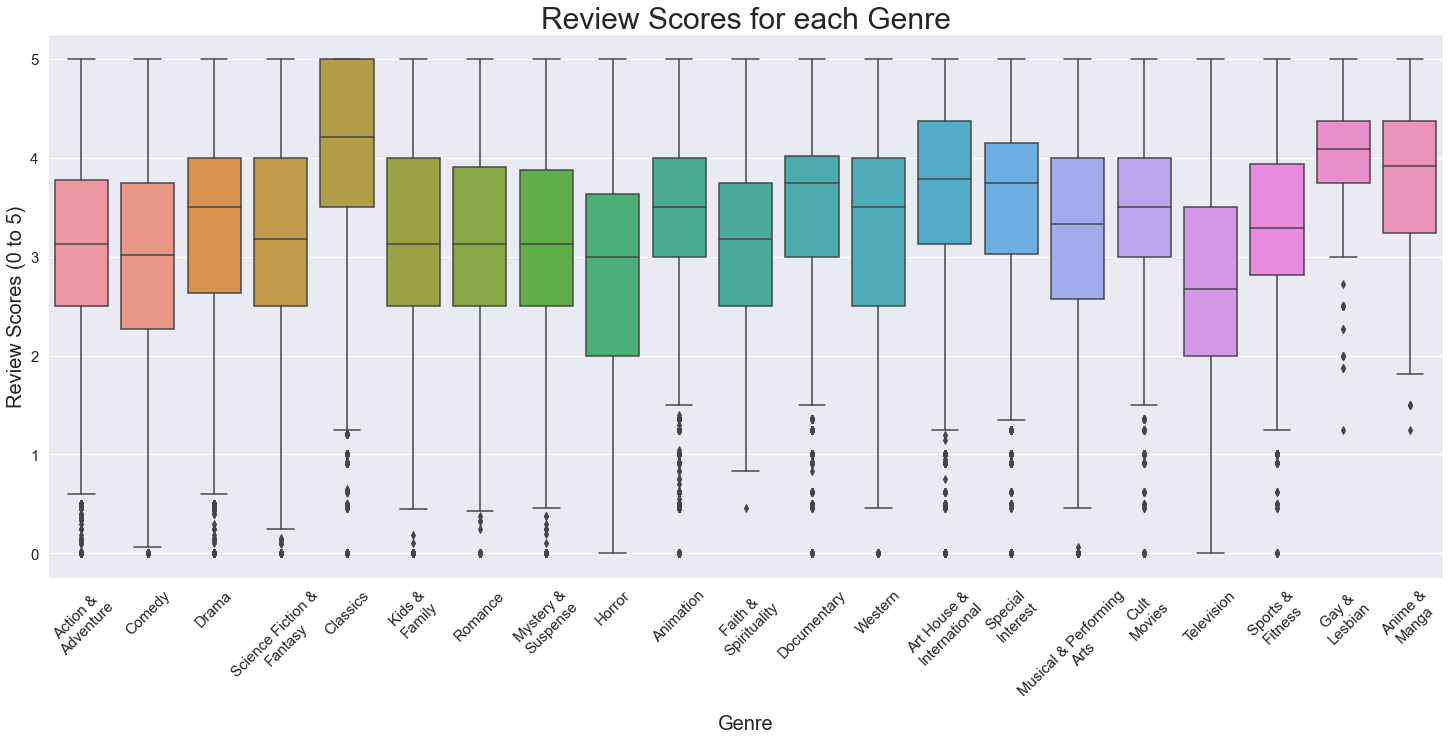

In [18]:
df_genre_edit = copy.deepcopy(df.loc[df['genres'] != 'No Genre'])
df_genre_edit['genres'] = df_genre_edit['genres'].map(lambda x: (' '.join(x.split()[:-1])+'\n'+x.split()[-1]).strip('\n'))

fig2, ax2 = plt.subplots(figsize = (25,10))
ax2 = sns.boxplot(x = 'genres', y = 'review_score', data = df_genre_edit)

ax2.set_title('Review Scores for each Genre', fontsize = 30)
ax2.set_xlabel('Genre', fontsize = 20)
ax2.set_ylabel('Review Scores (0 to 5)', fontsize = 20)
plt.xticks(rotation = 45)
ax2.tick_params(axis = 'both', labelsize = 15);

In [19]:
df['review_type'].value_counts()

Fresh     781191
Rotten    494226
Name: review_type, dtype: int64

In [20]:
df['fresh_bool'] = df['review_type'].map({'Fresh':1,'Rotten':0})

In [21]:
df.loc[:,['review_type','fresh_bool']].head()

review_type  fresh_bool
rotten_tomatoes_link                        
m/0814255                  Fresh           1
m/0814255                  Fresh           1
m/0814255                  Fresh           1
m/0814255                  Fresh           1
m/0814255                  Fresh           1

In [22]:
df_g_fb = df.loc[df['genres'] != 'No Genre'].groupby('genres')['fresh_bool'].mean().sort_values(ascending = False)
df_g_fb.index = df_g_fb.index.map(lambda x: x.replace(' ','\n'))
df_g_fb.head()

genres
Gay\n&\nLesbian                 0.896667
Classics                        0.833730
Anime\n&\nManga                 0.829787
Art\nHouse\n&\nInternational    0.804442
Documentary                     0.782914
Name: fresh_bool, dtype: float64

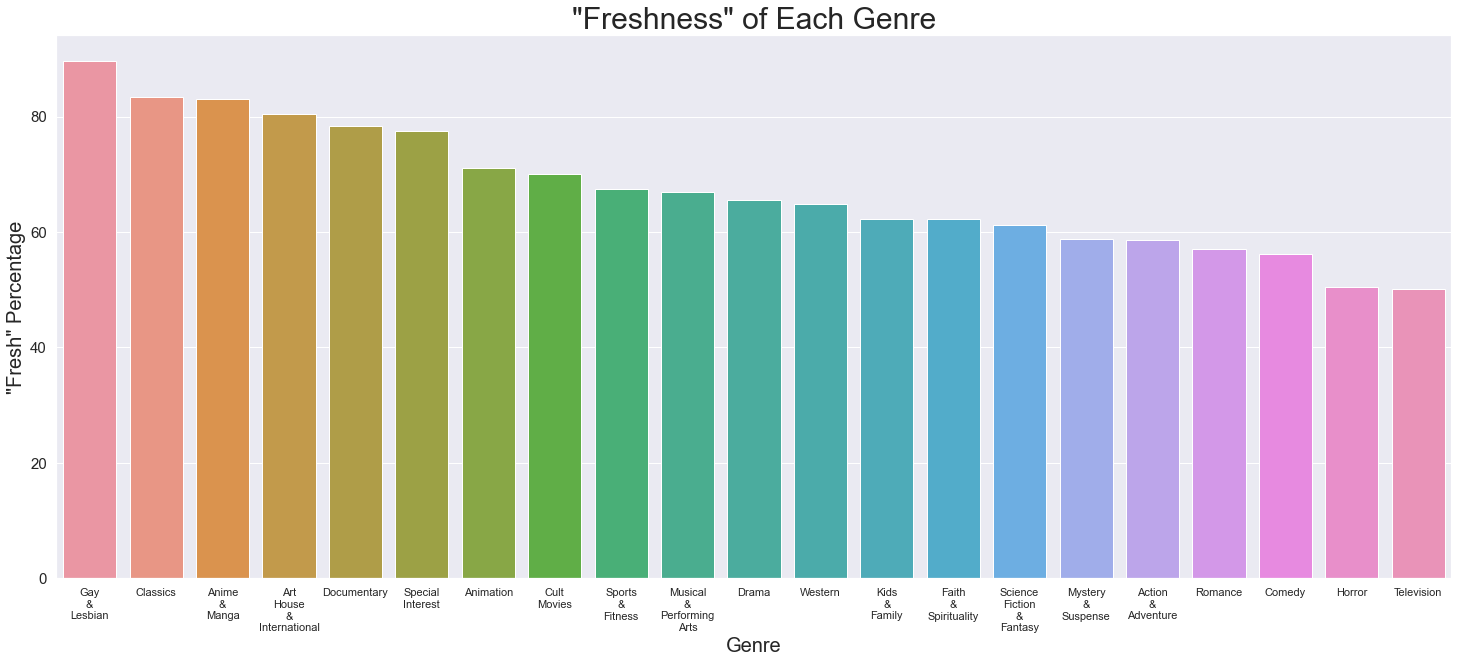

In [23]:
fig3, ax3 = plt.subplots(figsize = (25,10))
ax3 = sns.barplot(x = df_g_fb.index, y = df_g_fb.values*100)

ax3.set_title('"Freshness" of Each Genre', fontsize = 30)
ax3.set_xlabel('Genre', fontsize = 20)
ax3.set_ylabel('"Fresh" Percentage', fontsize = 20)
ax3.tick_params(axis = 'y', labelsize = 15);

In [24]:
df['review_datetime'] = df['review_date'].map(lambda x: time.strptime(x, "%Y-%m-%d"))
df.head(1)

movie_title  \
rotten_tomatoes_link                                                      
m/0814255             Percy Jackson & the Olympians: The Lightning T...   

                     content_rating              genres         directors  \
rotten_tomatoes_link                                                        
m/0814255                        PG  Action & Adventure  [Chris Columbus]   

                                                           authors  \
rotten_tomatoes_link                                                 
m/0814255             [Craig Titley, Chris Columbus, Rick Riordan]   

                                                                 actors  \
rotten_tomatoes_link                                                      
m/0814255             [Logan Lerman, Brandon T. Jackson, Alexandra D...   

                      runtime production_company tomatometer_status  \
rotten_tomatoes_link                                                  
m/0814255               119.0   20th Century Fox             Rotten   

                      tomatometer_rating  ...  \
rotten_tomatoes_link                      ...   
m/0814255                           49.0  ...   

                      tomatometer_fresh_critics_count  \
rotten_tomatoes_link                                    
m/0814255                                          73   

                     tomatometer_rotten_critics_count      critic_name  \
rotten_tomatoes_link                                                     
m/0814255                                          76  Andrew L. Urban   

                      top_critic  publisher_name  review_type  review_score  \
rotten_tomatoes_link                                                          
m/0814255                      0  Urban Cinefile        Fresh       2.70883   

                     review_date  fresh_bool                   review_datetime  
rotten_tomatoes_link                                                            
m/0814255             2010-02-06           1  (2010, 2, 6, 0, 0, 0, 5, 37, -1)  

[1 rows x 25 columns]

In [25]:
cutoff = time.strptime('2016-01-01', '%Y-%m-%d')

df_rec = df.loc[df['review_datetime'] >= cutoff]

In [26]:
print(df['movie_title'].nunique())
print(df_rec['movie_title'].nunique())

4165
3787


In [27]:
df_rec_g_sc = df_rec.loc[df_rec['genres'] != 'No Genre'].groupby('genres')['review_score'].median().sort_values(ascending = False)
df_rec_g_sc.index = df_g_sc.index.map(lambda x: x.replace(' ','\n'))
df_rec_g_sc.head()

genres
Classics                        4.461742
Gay\n&\nLesbian                 4.245833
Anime\n&\nManga                 4.154673
Art\nHouse\n&\nInternational    4.000000
Special\nInterest               3.909697
Name: review_score, dtype: float64

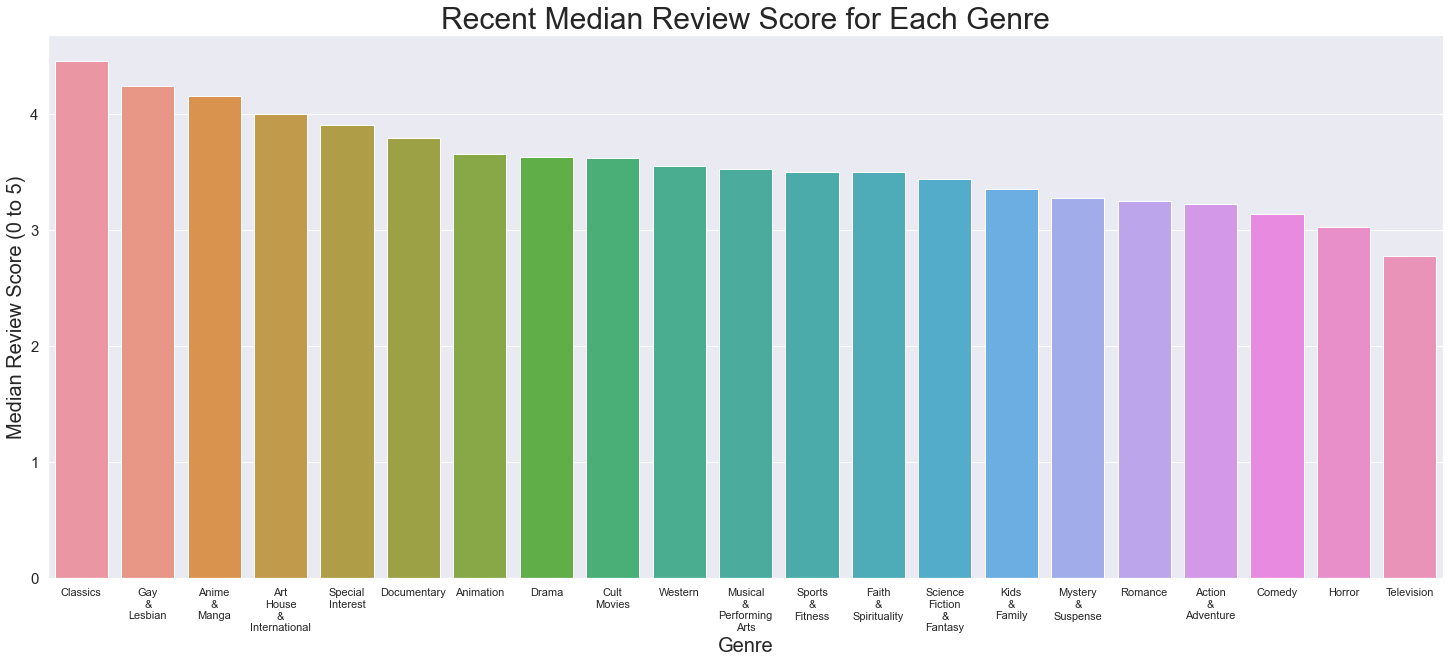

In [28]:
fig4, ax4 = plt.subplots(figsize = (25,10))
ax4 = sns.barplot(x = df_rec_g_sc.index, y = df_rec_g_sc.values)

ax4.set_title('Recent Median Review Score for Each Genre', fontsize = 30)
ax4.set_xlabel('Genre', fontsize = 20)
ax4.set_ylabel('Median Review Score (0 to 5)', fontsize = 20)
ax4.tick_params(axis = 'y', labelsize = 15);

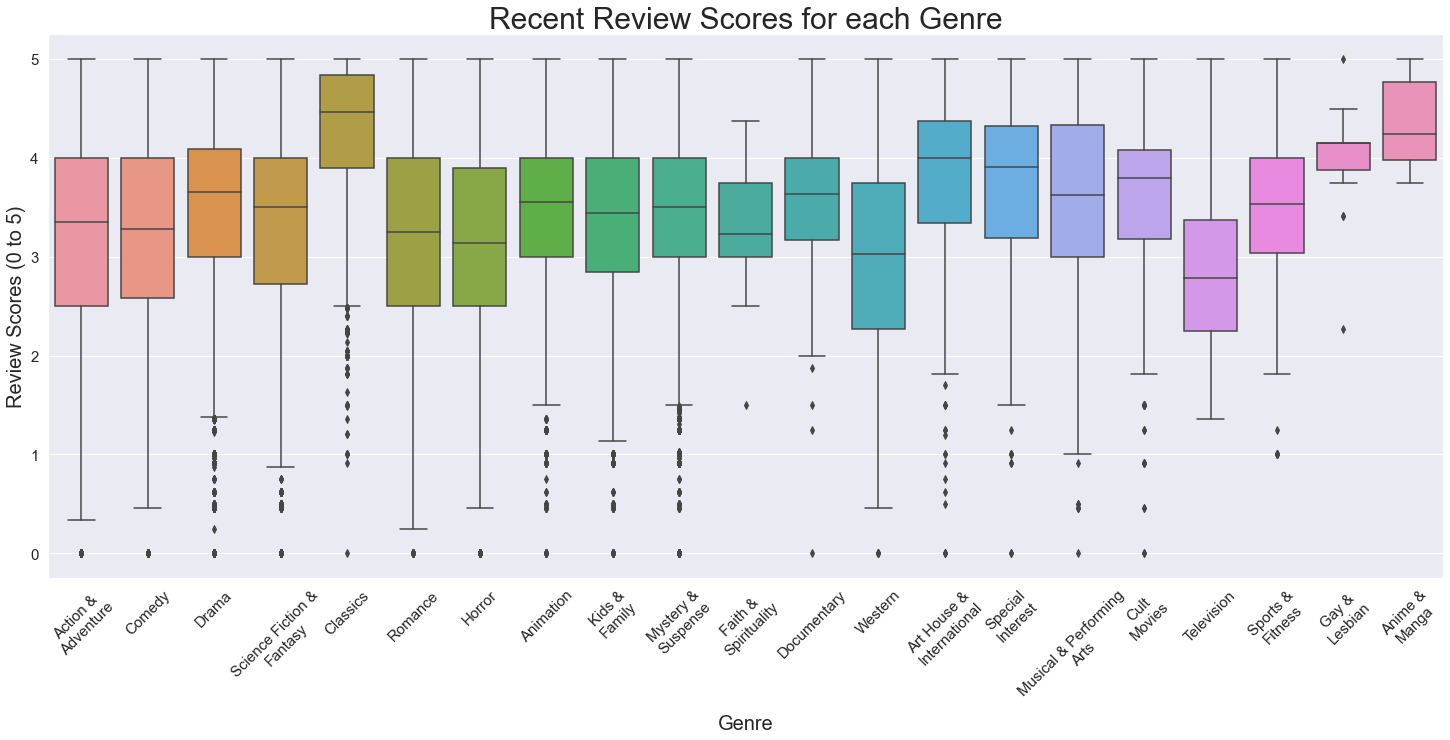

In [29]:
df_rec_genre_edit = copy.deepcopy(df_rec.loc[df_rec['genres'] != 'No Genre'])
df_rec_genre_edit['genres'] = df_rec_genre_edit['genres'].map(lambda x: (' '.join(x.split()[:-1])+'\n'+x.split()[-1]).strip('\n'))

fig5, ax5 = plt.subplots(figsize = (25,10))
ax5 = sns.boxplot(x = 'genres', y = 'review_score', data = df_rec_genre_edit)

ax5.set_title('Recent Review Scores for each Genre', fontsize = 30)
ax5.set_xlabel('Genre', fontsize = 20)
ax5.set_ylabel('Review Scores (0 to 5)', fontsize = 20)
plt.xticks(rotation = 45)
ax5.tick_params(axis = 'both', labelsize = 15);

In [30]:
df_rec_g_fb = df_rec.loc[df_rec['genres'] != 'No Genre'].groupby('genres')['fresh_bool'].mean().sort_values(ascending = False)
df_rec_g_fb.index = df_rec_g_fb.index.map(lambda x: x.replace(' ','\n'))
df_rec_g_fb.head()

genres
Anime\n&\nManga                 1.000000
Classics                        0.843047
Art\nHouse\n&\nInternational    0.834632
Special\nInterest               0.784047
Animation                       0.783872
Name: fresh_bool, dtype: float64

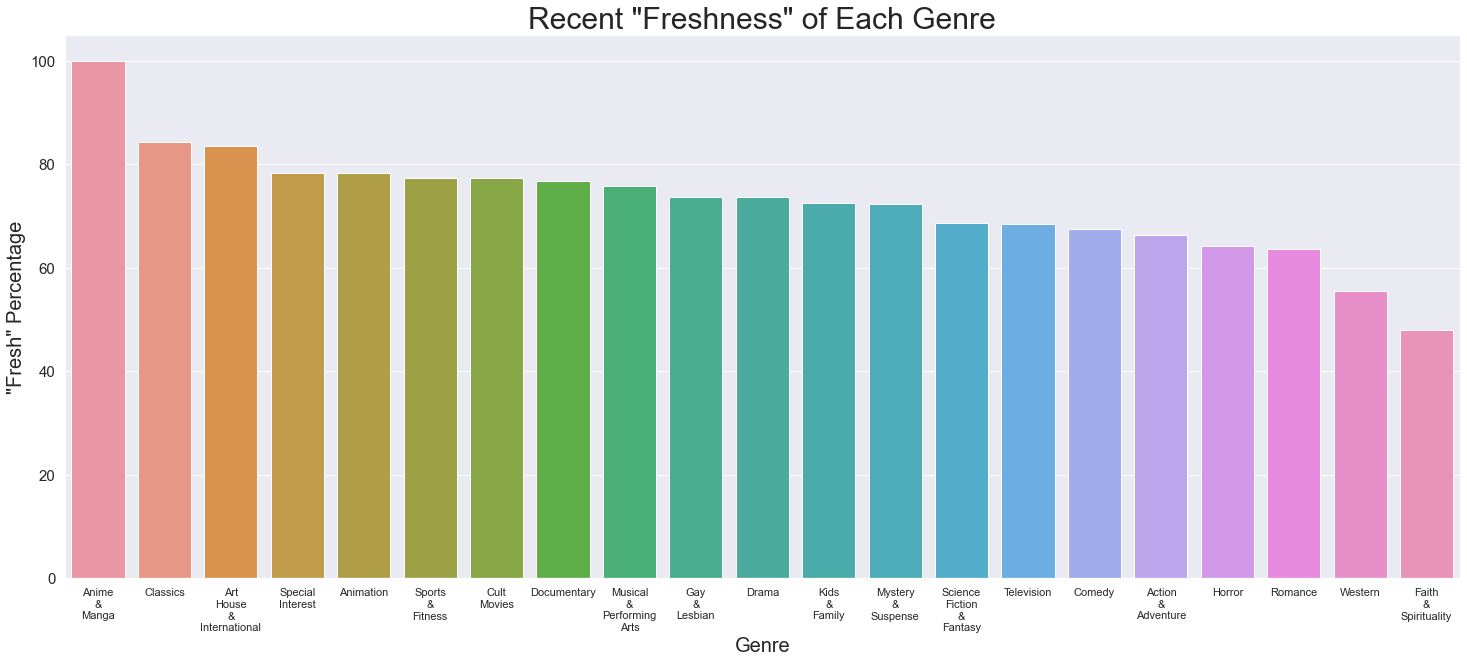

In [31]:
fig6, ax6 = plt.subplots(figsize = (25,10))
ax6 = sns.barplot(x = df_rec_g_fb.index, y = df_rec_g_fb.values*100)

ax6.set_title('Recent "Freshness" of Each Genre', fontsize = 30)
ax6.set_xlabel('Genre', fontsize = 20)
ax6.set_ylabel('"Fresh" Percentage', fontsize = 20)
ax6.tick_params(axis = 'y', labelsize = 15);